In [1]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

%matplotlib inline

In [2]:
df = pd.read_csv('PartD_Prescriber_PUF_NPI_17.txt', sep='\t')

In [3]:
#Confirming the file read in correctly with headers
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,92.0,220.0,14.0,0.0,0.0,0.0,0.0,143.0,91.0,2.1685
1,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,92.0,195.0,58.0,NaN,NaN,0.0,NaN,143.0,133.0,1.8029
2,1003000167,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,...,17.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.0598
3,1003000175,REYES-VASQUEZ,BELINDA,NaN,D.D.S.,F,I,322 N AZUSA AVE STE 202,NaN,LA PUENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003000282,BLAKEMORE,ROSIE,K,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,4.5148


In [4]:
#looking at the column names
df.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress

In [5]:
#looking at the number of rows and columns
df.shape

(1162898, 84)

In [6]:
#Checking some basic summary information
print(df.dtypes)

npi                                   int64
nppes_provider_last_org_name         object
nppes_provider_first_name            object
nppes_provider_mi                    object
nppes_credentials                    object
nppes_provider_gender                object
nppes_entity_code                    object
nppes_provider_street1               object
nppes_provider_street2               object
nppes_provider_city                  object
nppes_provider_zip5                 float64
nppes_provider_zip4                 float64
nppes_provider_state                 object
nppes_provider_country               object
specialty_description                object
description_flag                     object
medicare_prvdr_enroll_status         object
total_claim_count                     int64
total_30_day_fill_count             float64
total_drug_cost                     float64
total_day_supply                      int64
bene_count                          float64
ge65_suppress_flag              

In [7]:
df.describe()

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,1.162898e+06,1.162846e+06,1.005831e+06,1.162898e+06,1.162898e+06,1.162898e+06,1.162898e+06,1.031058e+06,910442.000000,910442.000000,...,822278.000000,557541.000000,393942.000000,510439.000000,404100.000000,841993.000000,346341.000000,683625.000000,683625.000000,1.031058e+06
mean,1.499872e+09,4.815898e+04,3.795007e+03,1.284985e+03,1.997596e+03,1.330248e+05,5.549234e+04,1.583495e+02,1260.035506,2061.076823,...,78.667494,176.402250,30.224396,5.119885,27.190765,0.236120,2.055590,150.386311,64.897733,1.527580e+00
std,2.879383e+08,3.024508e+04,2.254575e+03,3.094369e+03,4.686889e+03,3.623623e+05,1.314514e+05,2.033497e+02,2831.736754,4475.228235,...,95.878223,193.488394,61.173962,37.086346,84.149166,4.044135,7.996997,179.093446,85.674800,7.118753e-01
min,1.003000e+09,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.110000e-01
25%,1.245771e+09,2.122000e+04,2.056000e+03,5.500000e+01,6.400000e+01,1.518322e+03,9.850000e+02,3.400000e+01,72.000000,85.000000,...,23.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,20.000000,1.093700e+00
50%,1.497974e+09,4.515000e+04,3.356000e+03,2.030000e+02,2.410000e+02,1.008624e+04,4.685000e+03,8.600000e+01,246.000000,306.000000,...,47.000000,116.000000,11.000000,0.000000,0.000000,0.000000,0.000000,89.000000,40.000000,1.346500e+00
75%,1.740739e+09,7.671200e+04,5.166000e+03,9.950000e+02,1.397200e+03,1.011364e+05,3.763975e+04,2.100000e+02,1091.000000,1646.658333,...,99.000000,244.000000,35.000000,0.000000,25.000000,0.000000,0.000000,202.000000,79.000000,1.745200e+00
max,1.993000e+09,9.992900e+04,9.999000e+03,4.472880e+05,4.479605e+05,2.645885e+07,5.634058e+06,3.996500e+04,379162.000000,379751.000000,...,16557.000000,24213.000000,3592.000000,4073.000000,11353.000000,381.000000,995.000000,28139.000000,11826.000000,1.116440e+01


In [8]:
#Looking at the unique values, in descending order
unique = df.nunique()
unique.sort_values(ascending=False)

npi                                 1162898
total_drug_cost                      927168
total_drug_cost_ge65                 781583
pdp_drug_cost                        775289
nonlis_drug_cost                     745873
lis_drug_cost                        718829
generic_drug_cost                    703700
mapd_drug_cost                       689967
brand_drug_cost                      537659
nppes_provider_street1               393764
antibiotic_drug_cost                 288569
nppes_provider_last_org_name         262445
opioid_drug_cost                     257562
total_day_supply                     230328
total_30_day_fill_count_ge65         212212
total_day_supply_ge65                207218
other_drug_cost                      148137
total_30_day_fill_count              139684
antipsych_drug_cost_ge65             115561
la_opioid_drug_cost                  103970
nppes_provider_street2                83980
nppes_provider_first_name             82704
beneficiary_average_risk_score  

In [9]:
#Looking at null values in descending order
null = df.isnull().sum()
null.sort_values(ascending=False)

antipsych_ge65_suppress_flag        1001773
pdp_suppress_flag                    936166
mapd_suppress_flag                   936166
lis_suppress_flag                    922025
nonlis_suppress_flag                 922025
other_suppress_flag                  914928
antipsych_bene_ge65_suppress_flg     911239
ge65_suppress_flag                   910442
generic_suppress_flag                846561
beneficiary_race_other_count         816557
beneficiary_age_75_84_count          801394
beneficiary_age_greater_84_count     780371
beneficiary_race_black_count         768956
beneficiary_race_hispanic_count      758798
nppes_provider_street2               734402
brand_suppress_flag                  692559
beneficiary_race_asian_pi_count      652459
bene_count_ge65_suppress_flag        645306
beneficiary_age_65_74_count          622791
beneficiary_race_white_count         605357
bene_count_ge65                      517592
beneficiary_age_less_65_count        517592
la_opioid_prescriber_rate       

Possible features that have a high number of null values: information about beneficiary race and age so most likely will not include as features and remove these columns from analysis. As the file is large, it is running slow so would be beneficial to cut out some unneeded columns, such as those that have such a high number of null values so they wouldn't be useful for analysis. However, null values also mean that the data was suppressed, usually due to low number of beneficiaries (less than 10) so could also impute a number of 5 as a substitute (average value between 1-10). 

Due to this suppression reason, this is why the number of null values in the suppress_flag columns plus the number of null values in the claim_count/drug_cost is the total number of rows. If a value is suppressed, then it shows as a null value in these other corresponding columns and vice versa. 

Features to focus on include total_30_day_fill_count, total_day_supply, total_claim_count, bene_count (using 5 for null values) and total_drug_cost. These also look like they could have some significant outliers based on the summary statistics ran above. 

In [10]:
#Looking at values for variables to confirm if they add any identification assistance as these are not included in the LEIE dataset
df['nppes_provider_street2'].value_counts()

SUITE 200                                                12456
SUITE 100                                                12257
SUITE A                                                   7347
SUITE 101                                                 7072
SUITE 300                                                 6102
SUITE 201                                                 5794
SUITE B                                                   4837
SUITE 102                                                 4014
SUITE 1                                                   3463
SUITE 400                                                 3192
SUITE 202                                                 3181
SUITE 103                                                 2887
SUITE C                                                   2837
SUITE 210                                                 2637
SUITE 110                                                 2632
STE 100                                                

In [11]:
#looking the values for this to see if this is the second four digits of a zip code, probably not needed
df['nppes_provider_zip4'].value_counts()

1.0       19561
1900.0     2105
1000.0     2068
2.0        1908
2200.0     1641
1716.0     1554
1009.0     1527
2401.0     1517
1003.0     1410
3011.0     1392
2545.0     1367
6402.0     1310
4500.0     1310
3201.0     1293
2608.0     1280
6110.0     1279
1005.0     1212
3003.0     1130
2621.0     1110
0.0        1103
3522.0     1082
2360.0     1072
5103.0     1065
4009.0     1057
5400.0     1039
3328.0     1029
1447.0     1019
5000.0     1018
7101.0      965
3220.0      959
          ...  
9991.0        1
9994.0        1
9938.0        1
686.0         1
9876.0        1
691.0         1
9879.0        1
390.0         1
991.0         1
992.0         1
694.0         1
76.0          1
9856.0        1
9887.0        1
9892.0        1
895.0         1
253.0         1
693.0         1
9897.0        1
9899.0        1
891.0         1
9906.0        1
9909.0        1
9910.0        1
9911.0        1
9915.0        1
885.0         1
884.0         1
9917.0        1
196.0         1
Name: nppes_provider_zip

In [12]:
#Looking further at a couple of suppress_flag values
df['ge65_suppress_flag'].value_counts()

#    204945
*     47511
Name: ge65_suppress_flag, dtype: int64

In [13]:
df['bene_count_ge65_suppress_flag'].value_counts()

#    375975
*    141617
Name: bene_count_ge65_suppress_flag, dtype: int64

Per data documentation available with the dataset, * indicates that the value is supporessed as the number of beneficiaries is less than 11 and # indicates it is suppressed as the number of beneficiaries less than 65 years old is less than 11. 

In [14]:
#Exploring a few of what appear to be categorical columns more
df['medicare_prvdr_enroll_status'].value_counts()

E    952939
N    197031
O     12928
Name: medicare_prvdr_enroll_status, dtype: int64

E = provider is enrolled in Medicare; N = provider is not enrolled in medicare; O = provider has opted out of enrolling in medicare

In [15]:
df['nppes_entity_code'].value_counts()

I    1162895
O          3
Name: nppes_entity_code, dtype: int64

I indicates the provider is an individual and O means it is an organization. As nearly all are individuals, we may remove the organizations so that it does not throw off our model as their prescribing behavior could be very different

In [16]:
df['description_flag'].value_counts()

S    975902
T    186996
Name: description_flag, dtype: int64

This indicates the source of the specialty description, if it comes from the Medicare Specialty Code (S) or the Taxonomy Code Classification

In [17]:
df['nppes_provider_state'].value_counts()

CA    119867
NY     92548
TX     73753
FL     70951
PA     57589
IL     46821
OH     45412
MI     41812
MA     35730
NC     35636
NJ     31587
GA     29468
WA     26761
VA     26558
TN     25050
MD     23234
AZ     23073
MN     22149
IN     21835
MO     21680
WI     21559
CO     20096
CT     17461
LA     16607
OR     16410
KY     16233
SC     15782
AL     14426
OK     12037
IA     10772
       ...  
KS     10017
MS      9155
AR      8995
UT      8757
NV      7921
WV      7372
NM      7357
NE      7070
ME      6112
NH      5989
ID      5318
RI      4962
DC      4880
HI      4283
MT      3917
DE      3530
SD      3342
ND      2941
VT      2739
AK      2475
WY      1816
GU       180
VI       176
ZZ       166
AE        88
AP        57
MP        27
AA        23
XX        11
AS         4
Name: nppes_provider_state, Length: 61, dtype: int64

In addition to the 50 states plus DC, multiple armed forces are included, US territories and ZZ indicates Foreign country while XX indicates the state is unknown

In [18]:
df['nppes_provider_country'].value_counts()

US    1162732
CA         33
DE         28
JP         11
KR         10
IN          9
MX          9
IT          7
PK          4
SA          4
GB          4
TR          4
IL          3
TH          3
LB          3
GR          2
QA          2
ES          2
IE          2
KW          2
AE          2
CN          2
AA          2
KH          1
EG          1
CL          1
NL          1
AR          1
NO          1
CM          1
BA          1
MW          1
PE          1
AL          1
NZ          1
UG          1
AG          1
JO          1
OM          1
IQ          1
BH          1
Name: nppes_provider_country, dtype: int64

Exploring some of the continuous values of interest through histograms

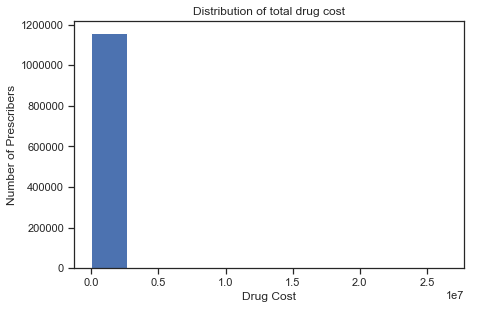

In [19]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['total_drug_cost'], bins=10, range=(df['total_drug_cost'].min(),df['total_drug_cost'].max()))
plt.title('Distribution of total drug cost')
plt.xlabel('Drug Cost')
plt.ylabel('Number of Prescribers')
plt.show()

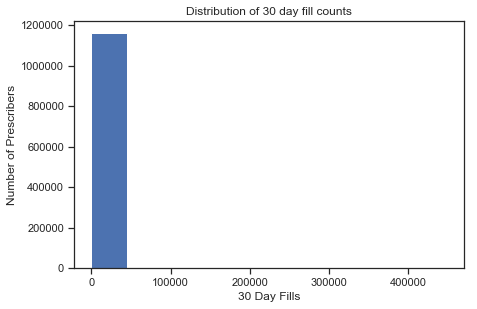

In [20]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['total_30_day_fill_count'], bins=10, range=(df['total_30_day_fill_count'].min(),df['total_30_day_fill_count'].max()))
plt.title('Distribution of 30 day fill counts')
plt.xlabel('30 Day Fills')
plt.ylabel('Number of Prescribers')
plt.show()

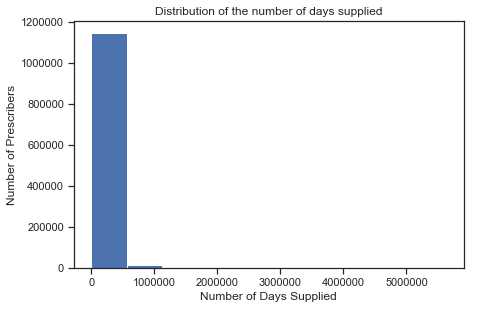

In [21]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['total_day_supply'], bins=10, range=(df['total_day_supply'].min(),df['total_day_supply'].max()))
plt.title('Distribution of the number of days supplied')
plt.xlabel('Number of Days Supplied')
plt.ylabel('Number of Prescribers')
plt.show()

The above histograms seem to indicate major outliers on the high end so will need to explore these more during analysis